Note for improvements: yellow taxis can pickup in all five ny boroughts but outside Manhattan the number of pickups is minimal so consider to filter only Manattan PULocationIDs

In [44]:
import pandas as pd
import numpy as np
import random
from datetime import date
import matplotlib.pyplot as plt
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [45]:
cd ../data

/home/angelrps/git/MasterDataScience_FinalProject/data


In [46]:
!ls -Rl

.:
total 3647856
-rwxrwxrwx 1 angelrps angelrps 1048588401 Mar 25 13:15 2017_Yellow_Taxi_Trip_Data.csv.bz2
-rwxrwxrwx 1 angelrps angelrps 1065918551 Jun 18 12:58 2018_Yellow_Taxi_Trip_Data.csv.bz2
-rwxrwxrwx 1 angelrps angelrps  835929368 Apr  2 18:02 2019_Yellow_Taxi_Trip_Data.csv.bz2
-rw-rw-rw- 1 angelrps angelrps   24377425 Jun 20 06:26 Data_Taxis_2017_Cleaned.csv
-rw-rw-rw- 1 angelrps angelrps   26220204 Jun 20 04:20 Data_Taxis_2018_Cleaned.csv
-rw-rw-rw- 1 angelrps angelrps   26759445 Jun 20 00:08 Data_Taxis_2019_Cleaned.csv
-rwxrwxrwx 1 angelrps angelrps     564780 Jun 18 11:15 Data_Weather_Cleaned.csv
-rwxrwxrwx 1 angelrps angelrps     436485 Jun 16 10:51 LCD_documentation.pdf
-rwxrwxrwx 1 angelrps angelrps   13843633 Jun 16 09:40 NOAA_CentralPark_Weather.csv
-rwxrwxrwx 1 angelrps angelrps    3755058 Jun 22 10:01 NY_taxi_zones.csv
-rwxrwxrwx 1 angelrps angelrps     196848 Apr  7 19:34 data_dictionary_trip_records_yellow.pdf
-rwxrwxrwx 1 angelrps angelrps    1489310 Apr  7 19:34 

In [ ]:
# Let´s start by joining just one year: 2019

#### Some sanity check that should have done before exporting the cleaned csvs:
- Filter by year as I have detected some data from different years(2001,2008,...)

In [39]:
dftax = pd.read_csv('./Data_Taxis_2019_Cleaned.csv', sep=',',
                        dtype = {"PULocationID" : "object"},
                        parse_dates=['pickup_datetime'])
dftax.head(100)

,pickup_datetime,PULocationID,NoOfPickups
0,2001-01-01 00:00:00,48,1
1,2001-01-01 00:00:00,151,1
2,2002-02-02 01:00:00,48,4
3,2002-02-02 01:00:00,79,1
4,2002-02-02 01:00:00,87,1
5,2002-02-02 01:00:00,142,1
6,2002-02-02 01:00:00,158,1
7,2002-02-02 01:00:00,239,1
8,2002-02-02 01:00:00,262,1
9,2002-02-02 01:00:00,263,1


In [36]:
dftax.shape

(1148068, 3)

In [47]:
dftax.drop(dftax[dftax['pickup_datetime'] < pd.Timestamp(date(2019,1,1))].index, inplace=True)
dftax.drop(dftax[dftax['pickup_datetime'] >= pd.Timestamp(date(2020,1,1))].index, inplace=True)

In [49]:
dftax.shape

(1147178, 3)

In [48]:
dftax.tail(500)

,pickup_datetime,PULocationID,NoOfPickups
1147142,2019-12-31 20:00:00,162,330
1147143,2019-12-31 20:00:00,163,205
1147144,2019-12-31 20:00:00,164,265
1147145,2019-12-31 20:00:00,165,3
1147146,2019-12-31 20:00:00,166,59
1147147,2019-12-31 20:00:00,167,1
1147148,2019-12-31 20:00:00,168,4
1147149,2019-12-31 20:00:00,169,2
1147150,2019-12-31 20:00:00,170,394
1147151,2019-12-31 20:00:00,179,8


## 2. Filter 2019 data

In [49]:
# SUMMARY

# 1. Import to dataframe.
dftax = pd.read_csv('./Data_Taxis_2019_Cleaned.csv', sep=',',
                        #dtype = {"PULocationID" : "object"},
                        parse_dates=['pickup_datetime'])

# 2. Filter 2019 data
dftax.drop(dftax[dftax['pickup_datetime'] < pd.Timestamp(date(2019,1,1))].index, inplace=True)
dftax.drop(dftax[dftax['pickup_datetime'] >= pd.Timestamp(date(2020,1,1))].index, inplace=True)

In [50]:
unique = dftax['PULocationID'].unique()
np.sort(unique)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 104, 105,
       106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
       159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
       172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 18

In [51]:
print(unique.shape)

(263,)


In [52]:
dftax[dftax['PULocationID']==24]

,pickup_datetime,PULocationID,NoOfPickups
475,2019-01-01 00:00:00,24,53
634,2019-01-01 01:00:00,24,50
801,2019-01-01 02:00:00,24,47
957,2019-01-01 03:00:00,24,27
1111,2019-01-01 04:00:00,24,17
1260,2019-01-01 05:00:00,24,7
1402,2019-01-01 06:00:00,24,10
1537,2019-01-01 07:00:00,24,10
1677,2019-01-01 08:00:00,24,20
1814,2019-01-01 09:00:00,24,9


## Create Data Frame with Manhattan zones

In [224]:
# 1. Import Location and Borough columns form NY TAXI ZONES dataset
dfzones = pd.read_csv('./NY_taxi_zones.csv', sep=',',
                      usecols=['LocationID', 'borough'])

# 2. Filter Manhattan zones
dfManZon = dfzones[dfzones['borough']=='Manhattan']

# 3. Filter unique Zone values
dfManZon = dfManZon.drop_duplicates('LocationID')

# 4. Drop Borough column to keep just LocationID values and short them
dfManZon = dfManZon.drop(['borough'], axis=1).sort_values(by='LocationID').reset_index()

dfManZon.shape
# There are 67 zones in Manhattan

(67, 2)

### Pickups in other boroughs (not Manhattan) are barely 10%. So I will remove them and leave just Manhattan's to reduce dimensionality.

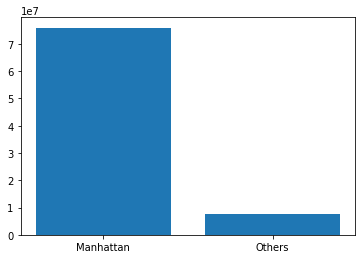

Manhattan = 75899117 Others = 7463369


In [134]:
# MANHATTAN PICKUPS VS OTHER BOROUGHS PICKUPS

dfManZon_array = dfManZon.iloc[:,0].values

# Manhattan pickups
dftaxM = dftax.loc[dftax['PULocationID'].isin(dfManZon_array)]
dftaxM=dftaxM.groupby(['PULocationID']).sum().reset_index().sort_values('NoOfPickups',ascending=False)
# Other boroughs pickups
dftaxOther = dftax.loc[~dftax['PULocationID'].isin(dfManZon_array)]
dftaxOther=dftaxOther.groupby(['PULocationID']).sum().reset_index().sort_values('NoOfPickups',ascending=False)

y1=dftaxM.NoOfPickups.sum()
y2=dftaxOther.NoOfPickups.sum()
plt.bar(range(2),[y1, y2])
plt.xticks(range(2), ['Manhattan', 'Others'])

plt.show()
print('Manhattan =',y1,'Others =',y2)

## 3. Filter Manhattan zones

In [163]:
# SUMMARY

# 1. Import to dataframe.
dftax = pd.read_csv('./Data_Taxis_2019_Cleaned.csv', sep=',',
                        #dtype = {"PULocationID" : "object"},
                        parse_dates=['pickup_datetime'])

# 2. Filter 2019 data
dftax.drop(dftax[dftax['pickup_datetime'] < pd.Timestamp(date(2019,1,1))].index, inplace=True)
dftax.drop(dftax[dftax['pickup_datetime'] >= pd.Timestamp(date(2020,1,1))].index, inplace=True)

# 3. Filter just Manhattan pickups
dfManZon_array = dfManZon.iloc[:,0].values
dftax = dftax.loc[dftax['PULocationID'].isin(dfManZon_array)]
dftax['PULocationID'].unique().shape

(66,)

## 4. Fill-in missing hourly periods

In [204]:
# SUMMARY

# 1. Import to dataframe.
dftax = pd.read_csv('./Data_Taxis_2019_Cleaned.csv', sep=',',
                        #dtype = {"PULocationID" : "object"},
                        parse_dates={'datetime':['pickup_datetime']})

# 2. Filter 2019 data
dftax.drop(dftax[dftax['datetime'] < pd.Timestamp(date(2019,1,1))].index, inplace=True)
dftax.drop(dftax[dftax['datetime'] >= pd.Timestamp(date(2020,1,1))].index, inplace=True)

# 3. Filter just Manhattan pickups
dfManZon_array = dfManZon.iloc[:,0].values
dftax = dftax.loc[dftax['PULocationID'].isin(dfManZon_array)]
dftax.head()

# 4. Fill-in missing hourly periods
dftax.set_index('datetime', inplace=True)
dftax.resample("H")
#dftax.reset_index(level=0, inplace=True) # convert datetime index back in column
t=dftax.index.unique() # there should be 8760 unique hourly periods in a year
t.shape

(8759,)

In [213]:
dftax.head(100)

,PULocationID,NoOfPickups
datetime,,
2019-01-01 00:00:00,4,49
2019-01-01 00:00:00,12,4
2019-01-01 00:00:00,13,64
2019-01-01 00:00:00,24,53
2019-01-01 00:00:00,41,82
2019-01-01 00:00:00,42,48
2019-01-01 00:00:00,43,272
2019-01-01 00:00:00,45,36
2019-01-01 00:00:00,48,481


## 5. Importing weather dataset and merge with taxis

In [239]:
# SUMMARY

# 1. Import to dataframe.
dftax = pd.read_csv('./Data_Taxis_2019_Cleaned.csv', sep=',',
                        #dtype = {"PULocationID" : "object"},
                        parse_dates={'datetime':['pickup_datetime']})

# 2. Filter 2019 data
dftax.drop(dftax[dftax['datetime'] < pd.Timestamp(date(2019,1,1))].index, inplace=True)
dftax.drop(dftax[dftax['datetime'] >= pd.Timestamp(date(2020,1,1))].index, inplace=True)

# 3. Filter just Manhattan pickups
dfManZon_array = dfManZon.iloc[:,0].values
dftax = dftax.loc[dftax['PULocationID'].isin(dfManZon_array)]
dftax.head()

# 4. Fill-in missing hourly periods
dftax.set_index('datetime', inplace=True)
dftax.resample("H")
#dftax.reset_index(level=0, inplace=True) # convert datetime index back in column
t=dftax.index.unique() # there should be 8760 unique hourly periods in a year

# 5.1 Import WEATHER DATASET to dataframe.
dfwea = pd.read_csv('./Data_Weather_Cleaned.csv', sep=',',
                        parse_dates={'datetime':['DATE']})
    # Filter 2019 data
dfwea.drop(dfwea[dfwea['datetime'] < pd.Timestamp(date(2019,1,1))].index, inplace=True)
dfwea.drop(dfwea[dfwea['datetime'] >= pd.Timestamp(date(2020,1,1))].index, inplace=True)

# 5.2 Merge datasets
df_merge = pd.merge(dftax, dfwea, on='datetime')
# taxis dataframe and merged dataframe should have same number of rows
print(df_merge.shape[0], dftax.shape[0])
df_merge.head()

426461 426461


,datetime,PULocationID,NoOfPickups,HourlyPrecipitation
0,2019-01-01,12,4,3.302
1,2019-01-01,13,64,3.302
2,2019-01-01,40,4,3.302
3,2019-01-01,41,82,3.302
4,2019-01-01,43,272,3.302


In [228]:
df_merge_col = pd.merge(dftax, dfwea, on='datetime')
df_merge_col.head()

,datetime,PULocationID,NoOfPickups,HourlyPrecipitation
0,2019-01-01,4,49,3.302
1,2019-01-01,12,4,3.302
2,2019-01-01,13,64,3.302
3,2019-01-01,24,53,3.302
4,2019-01-01,41,82,3.302


In [227]:
dftax.shape

(532407, 2)